In [1]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#Read the csv dataset

df = pd.read_csv('Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
#Print information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
#Drop name and torque column

df = df.drop(['name', 'torque'], axis=1)

In [5]:
#Drop all column with NaN value

df = df.dropna(how='any',axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7907 non-null   int64  
 1   selling_price  7907 non-null   int64  
 2   km_driven      7907 non-null   int64  
 3   fuel           7907 non-null   object 
 4   seller_type    7907 non-null   object 
 5   transmission   7907 non-null   object 
 6   owner          7907 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7907 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 741.3+ KB


In [6]:
#Drop row where max_power column is only bhp, not contain any digit number

print(df['max_power'][4933])
df = df.drop(4933)

 bhp


In [7]:
#Data cleansing from any string and change to float

df['mileage'] = df['mileage'].str.split().str.get(0).astype(float)
df['engine'] = df['engine'].str.split().str.get(0).astype(float)
df['max_power'] = df['max_power'].str.split().str.get(0).astype(float)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [8]:
#Look to the information of the dataset after cleansing and preprocessed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7906 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 741.2+ KB


In [9]:
#Change the year column into age

df['age'] = 2022 - df['year']
df = df.drop(['year'], axis=1)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,9
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,15
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,13
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,9


In [10]:
#Prepare the Data

X = df.drop(['selling_price'], axis=1)
X

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,8
1,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,8
2,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,16
3,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,12
4,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,15
...,...,...,...,...,...,...,...,...,...,...
8123,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,9
8124,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,15
8125,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,13
8126,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,9


In [11]:
#Encode and Scale the Data

oe = OrdinalEncoder(categories=[X['fuel'].unique(), X['seller_type'].unique(), X['transmission'].unique(), X['owner'].unique()], dtype=np.int)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_encoded = oe.fit_transform(df[['fuel', 'seller_type', 'transmission', 'owner']].values)
X['fuel'], X['seller_type'], X['transmission'], X['owner'] = X_encoded[:,0], X_encoded[:,1], X_encoded[:,2], X_encoded[:,3]
X[['km_driven', 'mileage', 'engine', 'max_power']] = scaler_x.fit_transform(X[['km_driven', 'mileage', 'engine', 'max_power']].values)
df['selling_price_normalize'] = scaler_y.fit_transform(df[['selling_price']].values)
y = df['selling_price_normalize']

In [12]:
#Print X

X

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,0.061640,0,0,0,0,0.557143,0.209396,0.112200,5.0,8
1,0.050837,0,0,0,1,0.503333,0.293289,0.192593,5.0,8
2,0.059310,1,0,0,2,0.421429,0.292953,0.123094,5.0,16
3,0.053803,0,0,0,0,0.547619,0.259060,0.155773,5.0,12
4,0.050837,1,0,0,0,0.383333,0.226174,0.150871,5.0,15
...,...,...,...,...,...,...,...,...,...,...
8123,0.046601,1,0,0,0,0.440476,0.192282,0.136302,5.0,9
8124,0.050414,0,0,0,3,0.400000,0.291611,0.210240,5.0,15
8125,0.050837,0,0,0,0,0.459524,0.209396,0.111928,5.0,13
8126,0.010591,0,0,0,0,0.561190,0.259060,0.101307,5.0,9


In [13]:
#Print y

y

0       0.042126
1       0.034102
2       0.012839
3       0.019559
4       0.010030
          ...   
8123    0.029087
8124    0.010532
8125    0.035306
8126    0.026078
8127    0.026078
Name: selling_price_normalize, Length: 7906, dtype: float64

In [14]:
#Split the Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=23)

In [15]:
#Search for the lowest MSE gained from 1-25 depth of tree

depth_mse = []
for i in range(1, 26):
  model = DecisionTreeRegressor(max_depth=i, random_state=23)
  model.fit(X_train.values, y_train)
  X_test_predicted = model.predict(X_test.values)
  mse = mean_squared_error(y_test, X_test_predicted)
  depth_mse.append(mse)

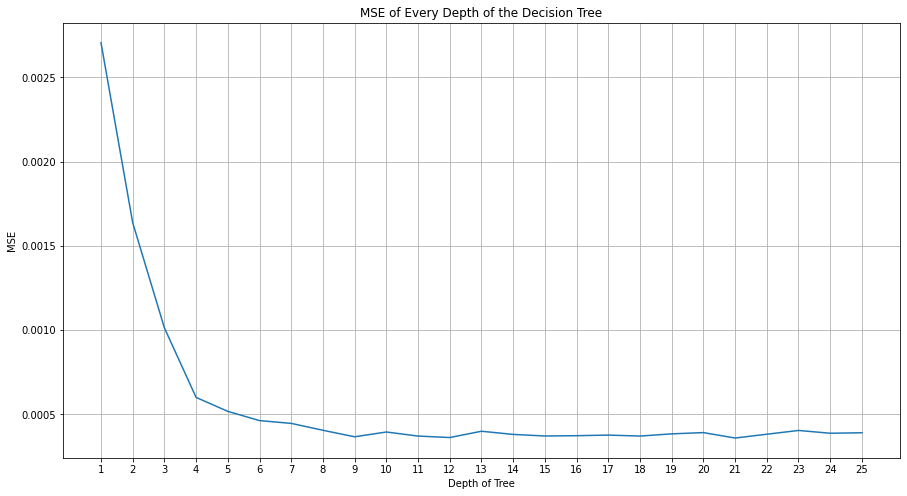

In [16]:
#Plot the MSE

fig = plt.figure(figsize=(15,8))
plt.title("MSE of Every Depth of the Decision Tree")
plt.plot(list(range(1, 26)), depth_mse)
plt.xticks(list(range(1,26)))
plt.ylabel("MSE")
plt.xlabel("Depth of Tree")
plt.grid()
plt.show()

In [17]:
#Search the max_depth where the lowest MSE gained

index_smallest = 0
for i in range(len(depth_mse)):
  if depth_mse[i] == min(depth_mse):
    print(depth_mse[i], i+1)
    index_smallest = i+1

0.0003602157489678353 21


In [18]:
#Fit the model with the lowest MSE gained from the max_depth

model = DecisionTreeRegressor(max_depth=index_smallest, random_state=23)
model.fit(X_train.values, y_train)

DecisionTreeRegressor(max_depth=21, random_state=23)

In [19]:
#MSE of the train phase

X_train_predicted = model.predict(X_train.values)
print('Mean Squared Error of Training Phase: ', mean_squared_error(y_train, X_train_predicted))

Mean Squared Error of Training Phase:  3.277037915291343e-06


In [20]:
#MSE of the test phase

X_test_predicted = model.predict(X_test.values)
print('Mean Squared Error of Testing Phase: ', mean_squared_error(y_test, X_test_predicted))

Mean Squared Error of Testing Phase:  0.0003602157489678353


In [21]:
#R2 score of the model

model.score(X_test.values, y_test)

0.939493057565097

In [22]:
#Function for encoding new data

def encode_new_data(unencoded_data = []):
  encoded_data = []
  encoded_data_temp = oe.transform([unencoded_data[1:5]])
  for i in range(len(unencoded_data)):
    if i > 0 and i < 5:
      encoded_data.append(encoded_data_temp[0][i-1])
    else:
      encoded_data.append(unencoded_data[i])
  return encoded_data

In [23]:
#Function for normalizing new data

def scaled_new_data(unscaled_data = []):
  prepare_data = []
  scaled_data = []
  for i in range(len(unscaled_data)):
    if i < 1 or i > 4 and i < 8:
      prepare_data.append(unscaled_data[i])
  data_transformed = scaler_x.transform([prepare_data])
  for i in range(len(unscaled_data)):
    if i < 1 or i > 4 and i < 8:
      if i > 4 and i < 8:
        scaled_data.append(data_transformed[0][i-4])
      else:
        scaled_data.append(data_transformed[0][i])
    else:
      scaled_data.append(unscaled_data[i])
  return scaled_data

In [24]:
#Function for predict new data

def predict_new_data(new_data = []):
  encoded_data = encode_new_data(new_data)
  scaled_data = scaled_new_data(encoded_data)
  predicted_data = model.predict([scaled_data])
  return predicted_data

In [25]:
#Function for denormalizing predicted new data

def denormalize_predicted(normalize_predicted):
  denormalized = scaler_y.inverse_transform(new_data_predicted.reshape(-1,1))
  return denormalized[0][0]

In [26]:
# Predict new data (km_driven = 67552; fuel = Petrol; seller_type = Individual;
#                   transmission = Automatic; Owner = first_owner; 
#                   mileage = 17.70; engine = 1396; max_power = 87.60; 
#                   seats = 5; age = 6)

new_data = [67552.0, 'Petrol', 'Individual', 'Automatic', 'First Owner', 
            17.70, 1396.0, 87.60, 5.0, 6]
new_data

[67552.0,
 'Petrol',
 'Individual',
 'Automatic',
 'First Owner',
 17.7,
 1396.0,
 87.6,
 5.0,
 6]

In [27]:
#Predict the new data

new_data_predicted = predict_new_data(new_data)
new_data_predicted

array([0.03711143])

In [28]:
#Normalized the predicted new data

predicted_denormalized = denormalize_predicted(new_data_predicted)
print('Price of a Car with:\nkm_driven = 67552;\nfuel = Petrol;\n'+
      'seller_type = Individual;\ntransmission = Automatic;\n'+
      'Owner = first_owner;\nmileage = 17.70;\nengine = 1396;\n'+
      'max_power = 87.60;\nseats = 5;\nage = 6\n\nis: ',
      predicted_denormalized)

Price of a Car with:
km_driven = 67552;
fuel = Petrol;
seller_type = Individual;
transmission = Automatic;
Owner = first_owner;
mileage = 17.70;
engine = 1396;
max_power = 87.60;
seats = 5;
age = 6

is:  400000.0
